In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
fp = "M:/DataSet/usaccident/US_Accidents_Dec20.csv"

'''
@param file_path: data file path
@param colNames: use columns, ("ID","TMC"...)
'''


def load_data(colNames, file_path=fp):
    return pd.read_csv(file_path, usecols=colNames)

Meaning of each column
====
ID: 编号; 　Source:事故报道的来源;　TMC:交通消息频道代码，可提供事件更详细的描述;<br>
Severity:事故严重程度;　Start_time:事故发生的当地时间;　End_time:事故的影响被消除的当地时间;<br>
Start_Lat:发生时纬度;　Start_Lng:发生时经度;　End_Lat:事件结束的纬度;　End_Lng:事件结束的经度;<br>
Distance(mi):受事故影响的道路长度;　Description:事故描述(自然语言);　Number:地址记录中的街道号码;<br>
Street:地址记录中的街道名称;　Side:地址记录中的街道相对侧;　City:城市;　County:县;<br>
State:州;　Zipcode:地址邮编;　Country:事发国家;　Timezone:事发地时区;<br>
Airport_Code:机场代码;　Weather_Timestamp:气象观测记录的时间戳(当地时间);<br>
Temperature(F):温度;　Wind_Chill(F):风寒;　Humidity(%):湿度;　Pressure(in):气压;<br>
Visibility(mi):能见度;　Wind_Direction:风向;　Wind_Speed(mph):风速;<br>
Precipitation(in):降水量;　Weather_Condition:天气状况;　Amenity:附近是否有便利设施;<br>
Bump:附近是否有减速带;　Crossing:附近是否为交叉路口;　Give_Way:是否让路？<br>
Junction:附近是否有路口;　No_Exit:附近是否有No_exit牌?　Railway:附近是否有铁路;<br>
Roundabout:附近是否有回旋路;　Station:附近是否有站台; Stop:附近是否有停靠站;<br>
Traffic_Calming:附近是否有Traffic_Calming;　Traffic_Signal:附近是否有交通灯<br>
Turning_Loop:附近是否有交通环路;　Sunrise_Sunset:当时是夜间还是白天(根据日出日落);<br>
Civil_Twilight:当时是夜间还是白天(根据暮光);　Nautical_Twilight:当时是夜间还是白天(根据航海暮光);<br>
Astronomical_Twilight:当时是夜间还是白天(根据天文暮光)

PART1: 事故发生率最高的州
====

CA    972585
TX    376445
FL    370131
SC    212712
NC    193457
Name: State, dtype: int64


<AxesSubplot:>

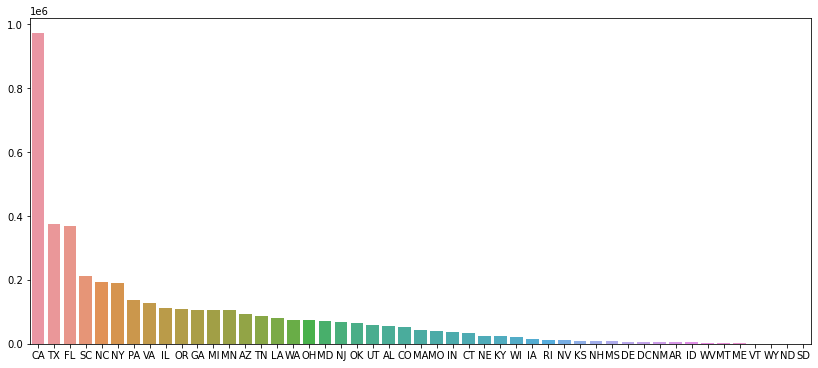

In [3]:
data = load_data(["State"])

print(data['State'].value_counts(ascending=False)[:5])

plt.figure(figsize=(14, 6))
sns.barplot(pd.value_counts(data['State']).index, pd.value_counts(
    data['State']).values, orient='v')

'''<br>
加州是发生事故次数最多的州

但是 事故'发生率'最高，可能需要考虑一下其他因素：<br>

    1.单位面积陆地平均每年发生多少起事故 = 次数 / 州面积<br>
    2.平均每年发生多少次事故 = 次数 / 每个州统计的时间<br>
    3.平均每x人中就有一位经历过事故 = 州人口/事故次数
      或者：平均每x次出行就会发生一次事故 = 出行次数/事故次数
    
其中的2 由于数据统计的是2016.2--2020.4年，所以每个州的时间跨度应该是相同的，可以用次数替代<br>

而每个州的面积，原数据没有给出，可上网查得<br>
'''

In [4]:
len(data['State'].unique())

49

In [5]:
sorted(data['State'].unique().tolist())
# 无： AK：阿拉斯加  HI：夏威夷
# 未知：DC：华盛顿哥伦比亚特区

['AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [6]:
'''
【1】. 综合考虑每个州的面积与事故次数
'''


state = pd.DataFrame({'counts': data['State'].value_counts()})
areas = {'AL': 131170, 'AR': 134770, 'AZ': 294207,
         'CA': 403466, 'CO': 268432, 'CT': 12541,
         'DC': 158, 'DE': 5048,
         'FL': 138888, 'GA': 148958,
         'IA': 144669, 'ID': 214044, 'IL': 143794, 'IN': 92789,
         'KS': 211755, 'KY': 102268,
         'LA': 111898,
         'MA': 20202, 'MD': 25141, 'ME': 79883, 'MI': 146435,
         'MN': 206233, 'MO': 178041, 'MS': 121530, 'MT': 376962,
         'NC': 125920, 'ND': 178712, 'NE': 198973, 'NH': 23188,
         'NJ': 19047, 'NM': 314160, 'NV': 284331, 'NY': 122056,
         'OH': 105830, 'OK': 177660, 'OR': 248608,
         'PA': 115884, 'RI': 2678,
         'SC': 77858, 'SD': 196350,
         'TN': 106798, 'TX': 676588,
         'UT': 212761, 'VA': 102279, 'VT': 212819,
         'WA': 172120, 'WI': 140269, 'WV': 62258, 'WY': 251470}

In [7]:
area_df = pd.DataFrame.from_dict(areas, orient='index')
area_df.rename(columns={0: 'area'}, inplace=True)

state = state.join(area_df)
state.head(5)

,counts,area
CA,972585,403466
TX,376445,676588
FL,370131,138888
SC,212712,77858
NC,193457,125920


In [8]:
# 过去4年内每平方千米陆地上平均发生多少起事故
state['Incidence(land)'] = state['counts'] / state['area']
state.head(5)

,counts,area,Incidence(land)
CA,972585,403466,2.410575
TX,376445,676588,0.556387
FL,370131,138888,2.664960
SC,212712,77858,2.732051
NC,193457,125920,1.536348


DC    41.208861
RI     4.821135
NJ     3.631386
MD     2.782626
SC     2.732051
Name: Incidence(land), dtype: float64


<AxesSubplot:>

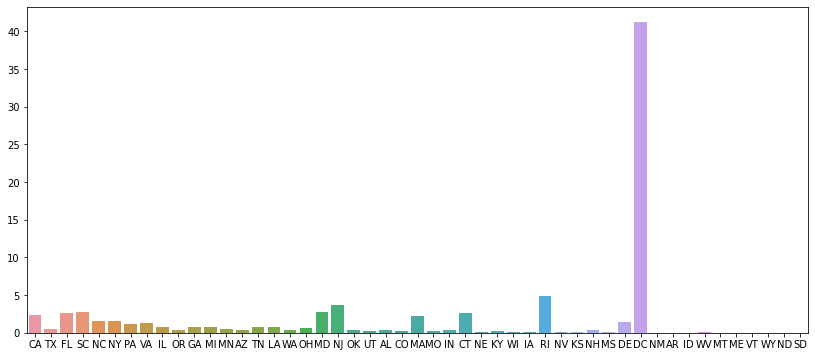

In [9]:
print(state['Incidence(land)'].sort_values(ascending=False).head(5))

plt.figure(figsize=(14, 6))
sns.barplot(state['Incidence(land)'].index,
            state['Incidence(land)'].values, orient='v')

In [10]:
'''
【2】.综合考虑每个州的人口与事故发生次数
'''

people = {'AL': 4887871, 'AR': 3013825, 'AZ': 7171646,
         'CA': 39557045, 'CO': 5695564, 'CT': 3572665,
         'DC': 702455, 'DE': 967171,
         'FL': 21299325, 'GA': 10519475,
         'IA': 3156145, 'ID': 1754208, 'IL': 12741080, 'IN': 6691878,
         'KS': 2911505, 'KY': 4468402,
         'LA': 4659978,
         'MA': 6902149, 'MD': 6042718, 'ME': 1338404, 'MI': 9998915,
         'MN': 5611179, 'MO': 6126452, 'MS': 2986530, 'MT': 1062305,
         'NC': 10383620, 'ND': 760077, 'NE': 1929268, 'NH': 1356458,
         'NJ': 9032873, 'NM': 2095428, 'NV': 3034392, 'NY': 19542209,
         'OH': 11689442, 'OK': 3943079, 'OR': 4190713,
         'PA': 12807060, 'RI': 1057315,
         'SC': 5084127, 'SD': 882235,
         'TN': 6770010, 'TX': 28701845,
         'UT': 3161105, 'VA': 8517685, 'VT': 626299,
         'WA': 7535591, 'WI': 5813568, 'WV': 1805832, 'WY': 577737}

In [11]:
people_df = pd.DataFrame.from_dict(people, orient='index')
people_df.rename(columns={0: 'people'}, inplace=True)

state = state.join(people_df)
state.head(5)

,counts,area,Incidence(land),people
CA,972585,403466,2.410575,39557045
TX,376445,676588,0.556387,28701845
FL,370131,138888,2.664960,21299325
SC,212712,77858,2.732051,5084127
NC,193457,125920,1.536348,10383620


In [12]:
# 过去4年内各州每x人中就有一个人经历过事故
state['Incidence(people)'] = state['people'] / state['counts']
state.head(5)

,counts,area,Incidence(land),people,Incidence(people)
CA,972585,403466,2.410575,39557045,40.672070
TX,376445,676588,0.556387,28701845,76.244458
FL,370131,138888,2.664960,21299325,57.545369
SC,212712,77858,2.732051,5084127,23.901458
NC,193457,125920,1.536348,10383620,53.674046


NC    53.674046
MN    53.188043
CA    40.672070
OR    38.676840
SC    23.901458
Name: Incidence(people), dtype: float64


<AxesSubplot:>

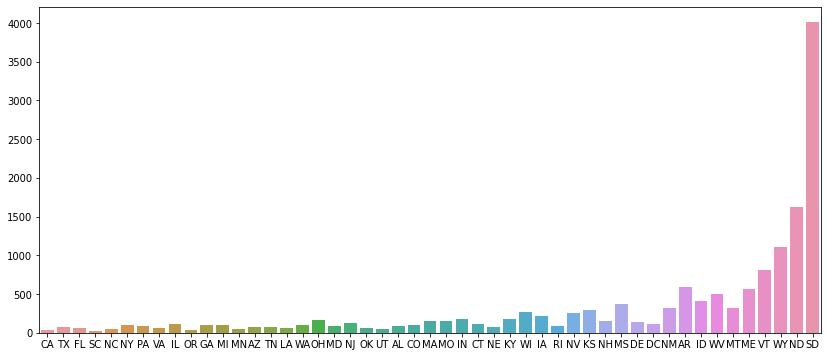

In [13]:
print(state['Incidence(people)'].sort_values(ascending=False).tail(5))

plt.figure(figsize=(14, 6))
sns.barplot(state['Incidence(people)'].index,
            state['Incidence(people)'].values, orient='v')

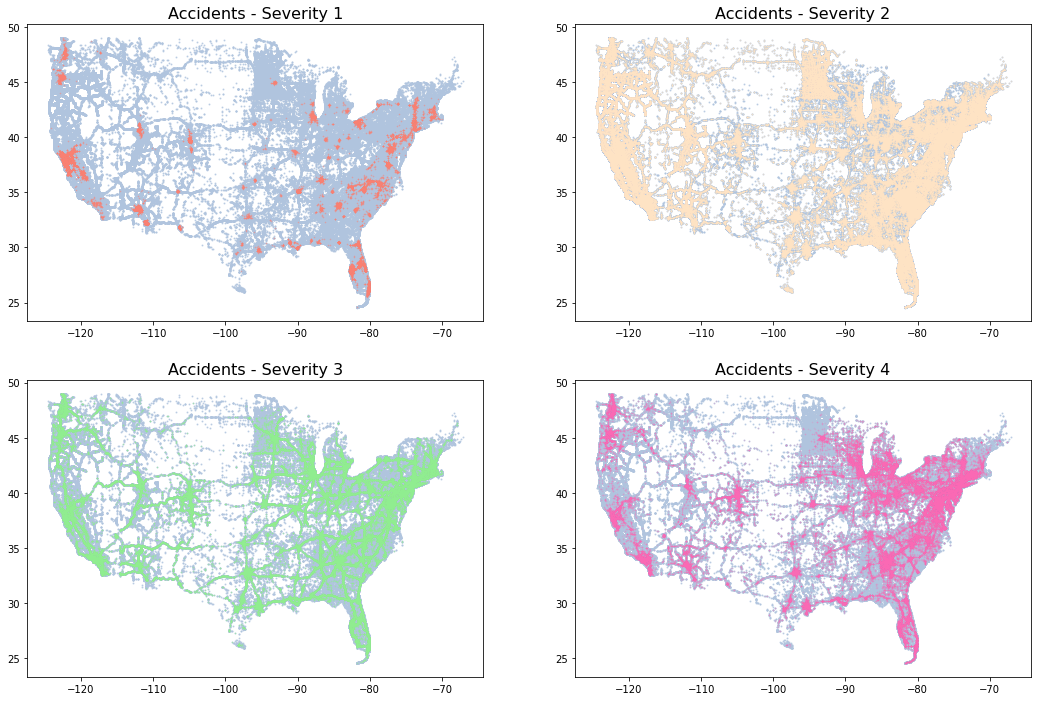

In [14]:
data = load_data(["Start_Lng","Start_Lat","Severity"])
data1 = data[data['Severity'] == 1]
data2 = data[data['Severity'] == 2]
data3 = data[data['Severity'] == 3]
data4 = data[data['Severity'] == 4]

fig,ax = plt.subplots(2,2,figsize=(18,12))
ax[0,0].plot(data['Start_Lng'],data['Start_Lat'],linestyle='',marker='o',
        markersize=1,color="lightsteelblue",alpha=0.7,label="Accident Sites")
ax[0,0].plot(data1['Start_Lng'],data1['Start_Lat'],linestyle='',marker='x',
        markersize=1,color="salmon",alpha=0.5,label="Severity 1")

ax[0,1].plot(data['Start_Lng'],data['Start_Lat'],linestyle='',marker='o',
        markersize=1,color="lightsteelblue",alpha=0.7,label="Accident Sites")
ax[0,1].plot(data2['Start_Lng'],data2['Start_Lat'],linestyle='',marker='x',
        markersize=1,color="bisque",alpha=0.5,label="Severity 2")

ax[1,0].plot(data['Start_Lng'],data['Start_Lat'],linestyle='',marker='o',
        markersize=1,color="lightsteelblue",alpha=0.7,label="Accident Sites")
ax[1,0].plot(data3['Start_Lng'],data3['Start_Lat'],linestyle='',marker='x',
        markersize=1,color="lightgreen",alpha=0.5,label="Severity 3")

ax[1,1].plot(data['Start_Lng'],data['Start_Lat'],linestyle='',marker='o',
        markersize=1,color="lightsteelblue",alpha=0.7,label="Accident Sites")
ax[1,1].plot(data4['Start_Lng'],data4['Start_Lat'],linestyle='',marker='x',
        markersize=1,color="hotpink",alpha=0.2,label="Severity 4")

ax[0,0].set_title("Accidents - Severity 1",size=16)
ax[0,1].set_title("Accidents - Severity 2",size=16)
ax[1,0].set_title("Accidents - Severity 3",size=16)
ax[1,1].set_title("Accidents - Severity 4",size=16)
plt.show()

Conclusion
=====
1. 从事故发生次数角度评价<br>
    发生次数最多的前5个州分别为：
        CA    972585 加利福尼亚州  
        TX    376445 得克萨斯州    
        FL    370131 佛罗里达州    
        SC    212712 南卡罗来纳州  
        NC    193457 北卡罗来纳州
               -- (次)
    缺陷：基数大，次数也多
        

2. 综合考虑该州的陆地面积与事故发生次数<br>
    发生率最高的前5个州分别为：
        DC    41.208861 华盛顿哥伦比亚特区州
        RI     4.821135 罗德岛州
        NJ     3.631386 新泽西州
        MD     2.782626 马里兰州
        SC     2.732051 南卡罗来纳州
               -- (次/(km^2*年))
3. 综合考虑该州人口(看做交通流量)与事故发生次数<br>
    发生率最高的前5个州分别为：
        NC    53.674046 北卡罗来纳州
        MN    53.188043 明尼苏达州
        CA    40.672070 加利福尼亚州
        OR    38.676840 俄勒冈州
        SC    23.901458 南卡罗来纳州 
               -- (每n人遭遇一次事故)
    缺陷：人数应该用出行人次算，但是拿不到数据，只能用人口数大概估计
4. 美国的重大交通事故(3,4级)：主要发生在州际公路上(蓝色为州际公路)
<img src="./stateroad.png">
（来自WIKI百科）

PART2.事故高发期
====

In [15]:
data = load_data(["Start_Time"])
data.head(5)

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07


In [16]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'],format="%Y-%m-%d %H:%M:%S")

data['Year'] = data['Start_Time'].dt.year
data['Month'] = data['Start_Time'].dt.month
data['Day'] = data['Start_Time'].dt.day
data['Hour'] = data['Start_Time'].dt.hour
data['Minute'] = data['Start_Time'].dt.minute
data.head(5)

,Start_Time,Year,Month,Day,Hour,Minute
0,2016-02-08 05:46:00,2016,2,8,5,46
1,2016-02-08 06:07:59,2016,2,8,6,7
2,2016-02-08 06:49:27,2016,2,8,6,49
3,2016-02-08 07:23:34,2016,2,8,7,23
4,2016-02-08 07:39:07,2016,2,8,7,39


<AxesSubplot:xlabel='Hour', ylabel='Density'>

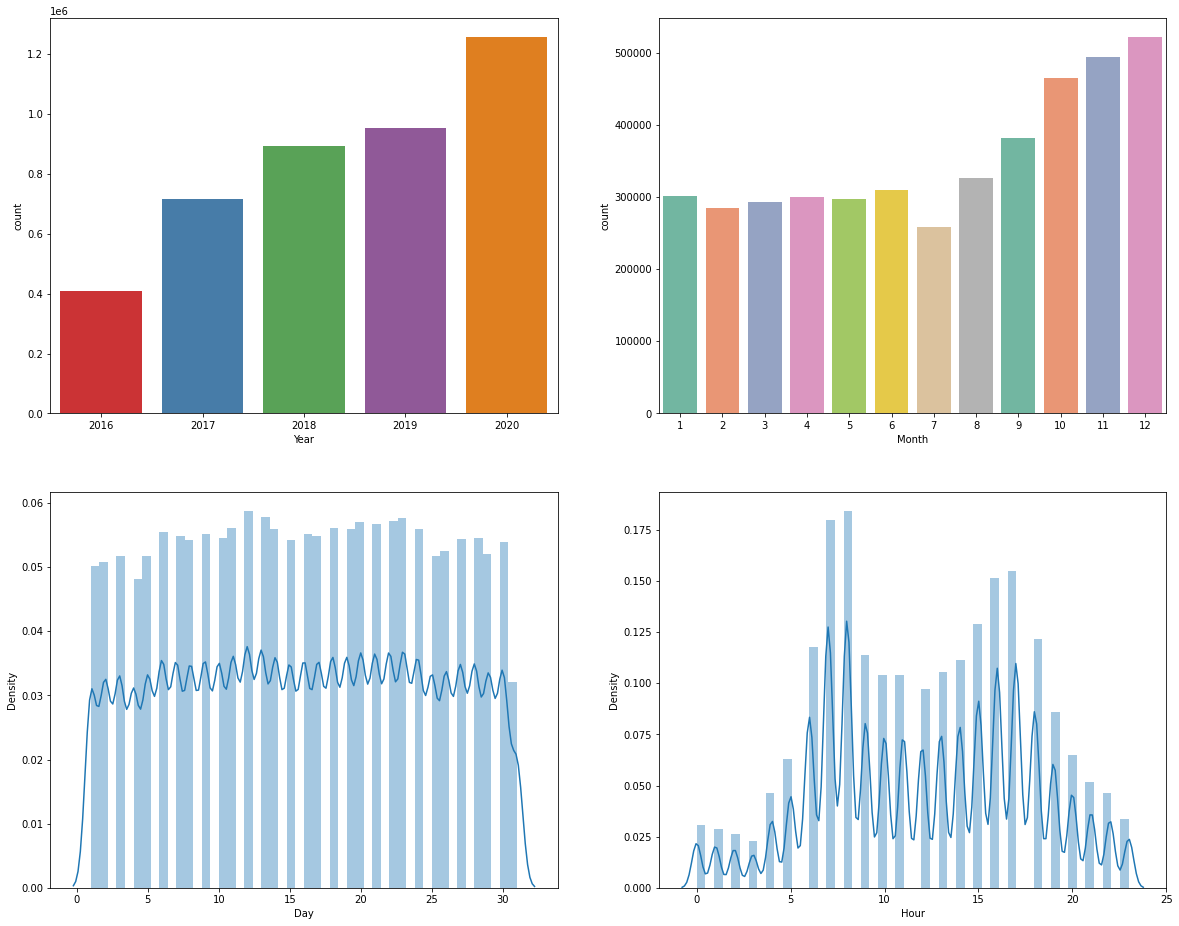

In [17]:
fig, ax = plt.subplots(2,2,figsize=(20,16))

sns.countplot(data['Year'],ax=ax[0,0],palette='Set1')
sns.countplot(data['Month'],ax=ax[0,1],palette='Set2')
sns.distplot(data['Day'],ax=ax[1,0])
sns.distplot(data['Hour'],ax=ax[1,1])

<AxesSubplot:xlabel='Year,Month'>

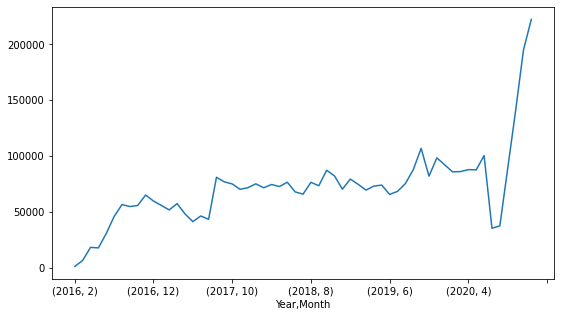

In [18]:
plt.figure(figsize=(9,5))
data.groupby(by=['Year','Month']).size().plot()

In [19]:
severity = load_data(["Severity"])
data['Severity'] = severity['Severity']
data.head(5)

,Start_Time,Year,Month,Day,Hour,Minute,Severity
0,2016-02-08 05:46:00,2016,2,8,5,46,3
1,2016-02-08 06:07:59,2016,2,8,6,7,2
2,2016-02-08 06:49:27,2016,2,8,6,49,2
3,2016-02-08 07:23:34,2016,2,8,7,23,3
4,2016-02-08 07:39:07,2016,2,8,7,39,2


In [20]:
data['Season'] = None
data.Season[(data['Month'] > 3) & (data['Month'] <= 6)] = 'Spring'
data.Season[(data['Month'] > 6) & (data['Month'] <= 9)] = 'Summer'
data.Season[(data['Month'] > 9) & (data['Month'] <= 12)] = 'Autumn'
data.Season[(data['Month'] >= 1) & (data['Month'] <= 3)] = 'Winter'
data.head(5)

,Start_Time,Year,Month,Day,Hour,Minute,Severity,Season
0,2016-02-08 05:46:00,2016,2,8,5,46,3,Winter
1,2016-02-08 06:07:59,2016,2,8,6,7,2,Winter
2,2016-02-08 06:49:27,2016,2,8,6,49,2,Winter
3,2016-02-08 07:23:34,2016,2,8,7,23,3,Winter
4,2016-02-08 07:39:07,2016,2,8,7,39,2,Winter


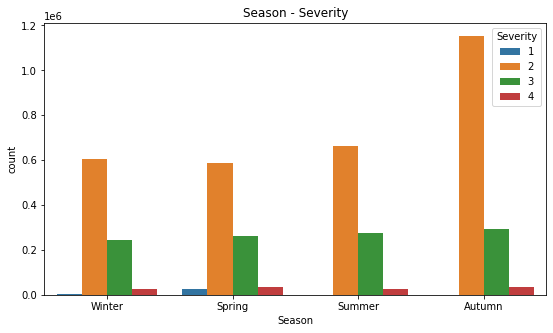

In [21]:
plt.figure(figsize=(9,5))
sns.countplot(data['Season'],hue=data['Severity'])
plt.title("Season - Severity")
plt.show()

<AxesSubplot:xlabel='Hour', ylabel='count'>

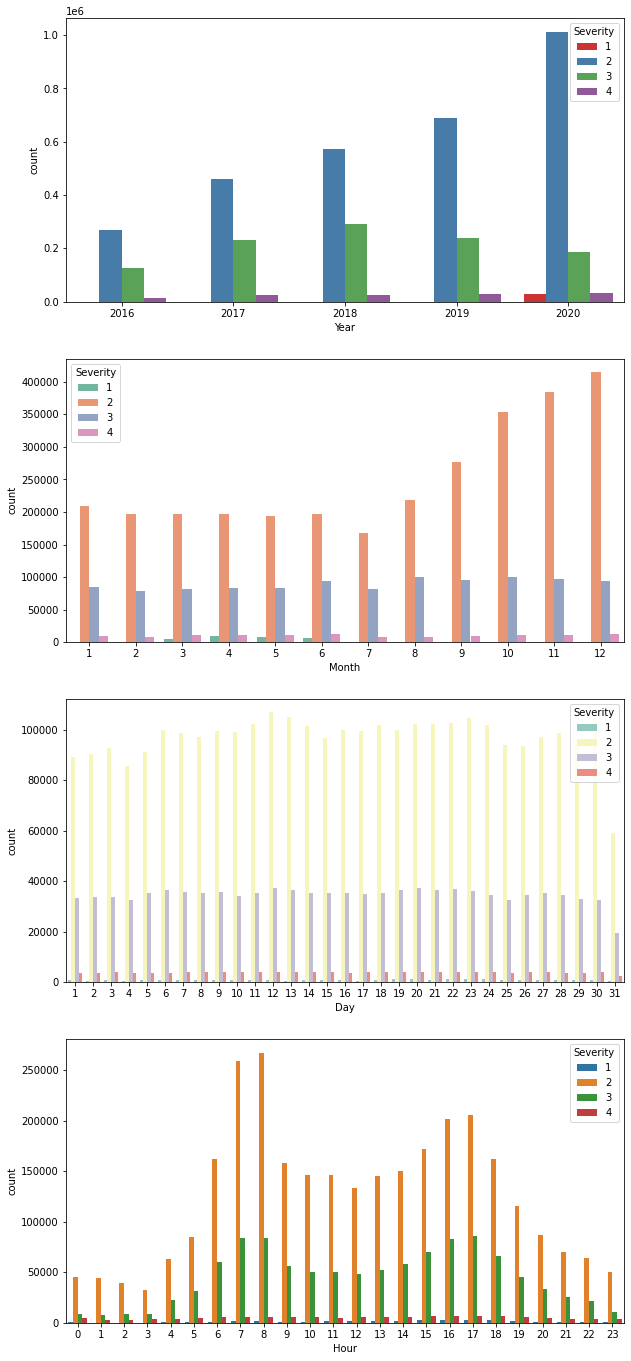

In [22]:
fig, ax = plt.subplots(4,1,figsize=(10,24))

sns.countplot(data['Year'],hue=data['Severity'],ax=ax[0],palette='Set1')
sns.countplot(data['Month'],hue=data['Severity'],ax=ax[1],palette='Set2')
sns.countplot(data['Day'],hue=data['Severity'],ax=ax[2],palette='Set3')
sns.countplot(data['Hour'],hue=data['Severity'],ax=ax[3])

In [23]:
data['Impact'] = None
data.loc[((data['Severity'] == 3) |(data['Severity'] == 4)),"Impact"] = "Serious"
data.loc[((data['Severity'] == 1) |(data['Severity'] == 2)),"Impact"] = "Slight"
data.head(5)

,Start_Time,Year,Month,Day,Hour,Minute,Severity,Season,Impact
0,2016-02-08 05:46:00,2016,2,8,5,46,3,Winter,Serious
1,2016-02-08 06:07:59,2016,2,8,6,7,2,Winter,Slight
2,2016-02-08 06:49:27,2016,2,8,6,49,2,Winter,Slight
3,2016-02-08 07:23:34,2016,2,8,7,23,3,Winter,Serious
4,2016-02-08 07:39:07,2016,2,8,7,39,2,Winter,Slight


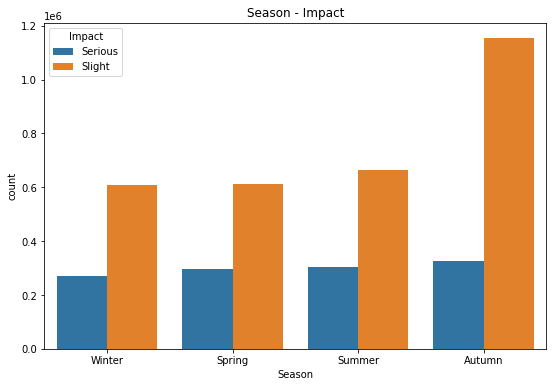

In [24]:
plt.figure(figsize=(9,6))
sns.countplot(data['Season'],hue=data['Impact'])
plt.title("Season - Impact")
plt.show()

<AxesSubplot:xlabel='Hour', ylabel='count'>

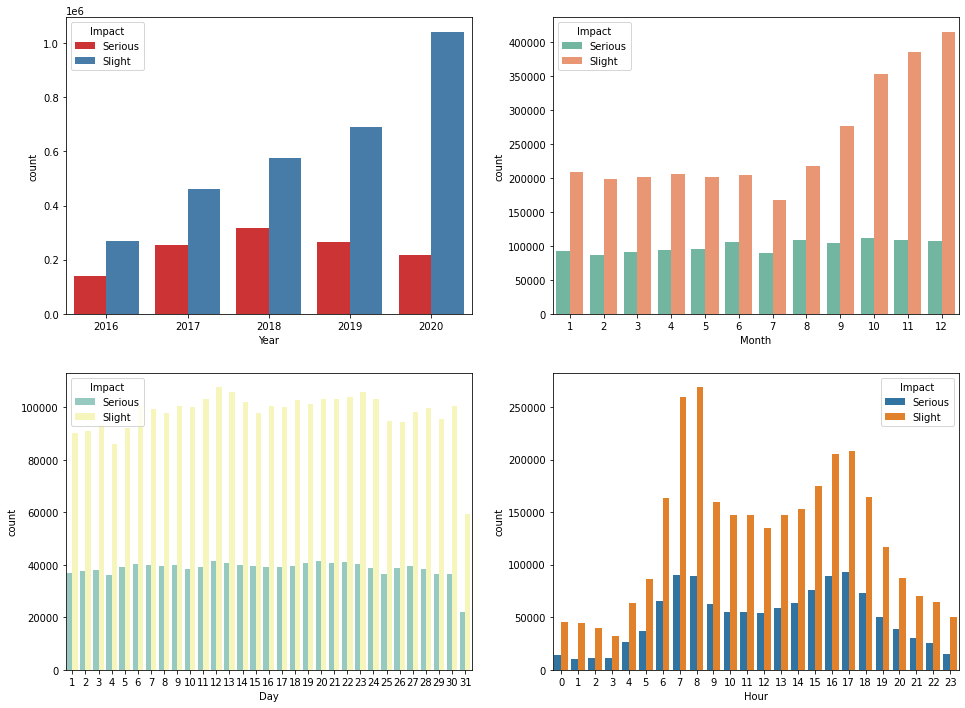

In [25]:
fig, ax = plt.subplots(2,2,figsize=(16,12))

sns.countplot(data['Year'],hue=data['Impact'],ax=ax[0,0],palette='Set1')
sns.countplot(data['Month'],hue=data['Impact'],ax=ax[0,1],palette='Set2')
sns.countplot(data['Day'],hue=data['Impact'],ax=ax[1,0],palette='Set3')
sns.countplot(data['Hour'],hue=data['Impact'],ax=ax[1,1])

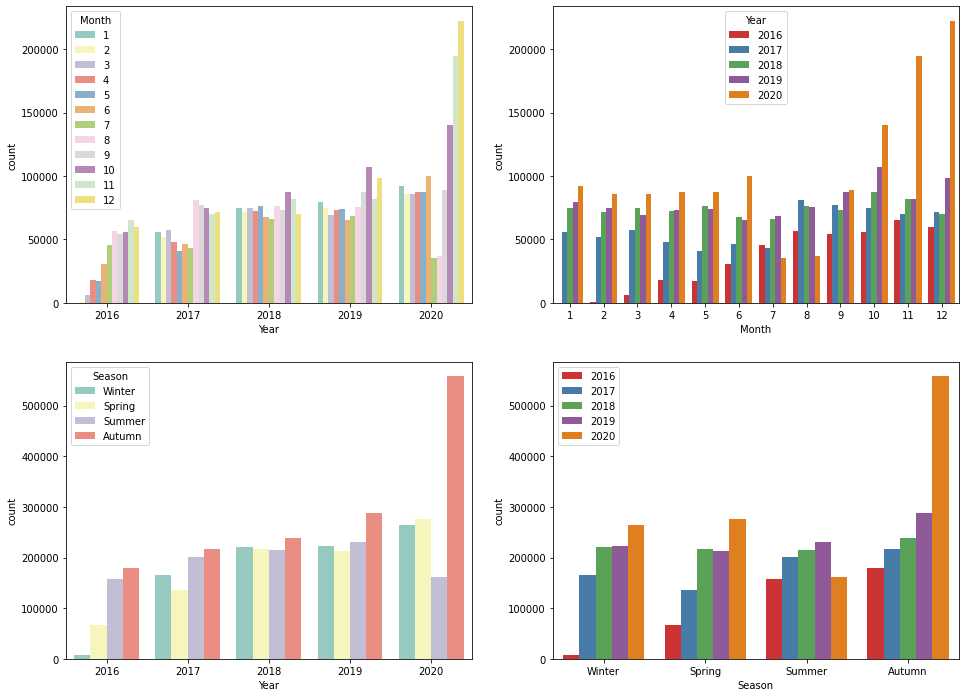

In [26]:
fig,ax = plt.subplots(2,2,figsize=(16,12))
sns.countplot(data['Year'],hue=data['Month'],palette='Set3',ax=ax[0,0])
sns.countplot(data['Month'],hue=data['Year'],palette='Set1',ax=ax[0,1])
sns.countplot(data['Year'],hue=data['Season'],palette='Set3',ax=ax[1,0])
sns.countplot(data['Season'],hue=data['Year'],palette='Set1',ax=ax[1,1])
plt.legend(loc="upper left")
plt.show()

In [27]:
data['Weekday'] = data['Start_Time'].dt.weekday

maps = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
data['Weekday'] = data['Weekday'].map(maps)
data.head(5)

,Start_Time,Year,Month,Day,Hour,Minute,Severity,Season,Impact,Weekday
0,2016-02-08 05:46:00,2016,2,8,5,46,3,Winter,Serious,Monday
1,2016-02-08 06:07:59,2016,2,8,6,7,2,Winter,Slight,Monday
2,2016-02-08 06:49:27,2016,2,8,6,49,2,Winter,Slight,Monday
3,2016-02-08 07:23:34,2016,2,8,7,23,3,Winter,Serious,Monday
4,2016-02-08 07:39:07,2016,2,8,7,39,2,Winter,Slight,Monday


<AxesSubplot:xlabel='Season', ylabel='count'>

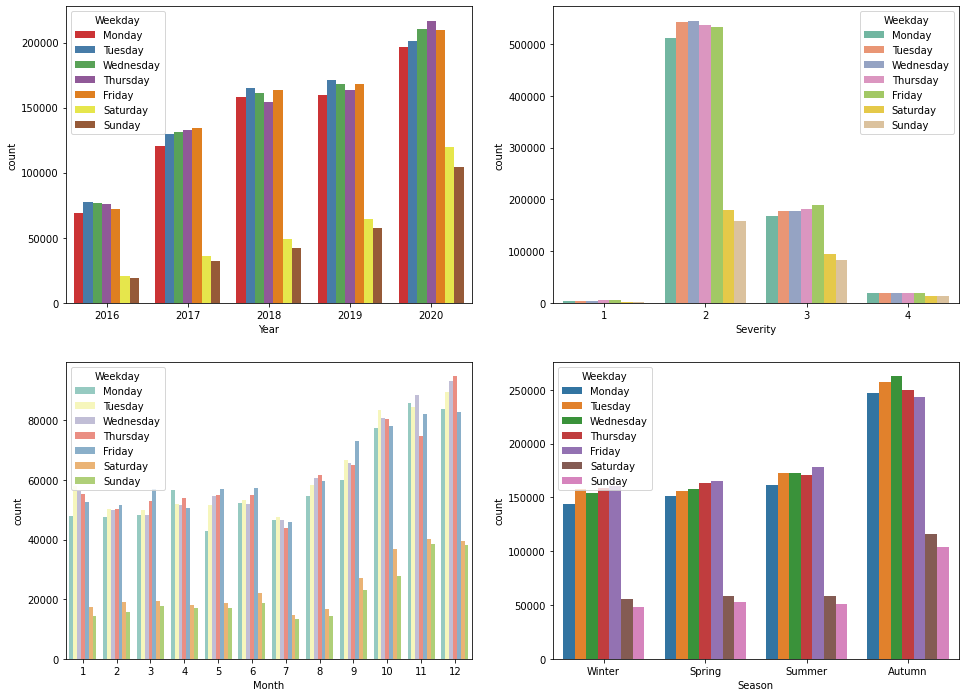

In [28]:
fig,ax = plt.subplots(2,2,figsize=(16,12))
sns.countplot(data['Year'],hue=data['Weekday'],ax=ax[0,0],palette='Set1')
sns.countplot(data['Severity'],hue=data['Weekday'],ax=ax[0,1],palette='Set2')
sns.countplot(data['Month'],hue=data['Weekday'],ax=ax[1,0],palette='Set3')
sns.countplot(data['Season'],hue=data['Weekday'],ax=ax[1,1])

<AxesSubplot:xlabel='Weekday', ylabel='count'>

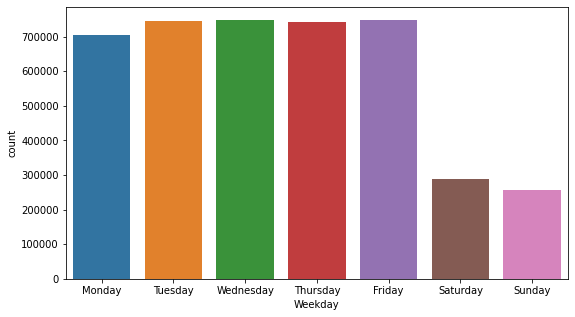

In [29]:
plt.figure(figsize=(9,5))
sns.countplot(data['Weekday'])

Conclusion
====
1. 2016 -- 2019年间，美国的事故总次数逐年增长，增长主要来源于中小事故
2. 每年的8--12月是事故高发季
3. 秋冬季事故发生次数逐年增长
4. 事故的严重程度与月份、季节没有明显的相关性
5. 一天当中，早上7-8点与下午4,5点是事故高发时间段(或许是因为早晚高峰)
6. 周六与周日是一周中发生事故最少的日子